In [1]:
#IMPORT 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import gensim.downloader as api
import gensim.downloader
import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import export_graphviz
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
import graphviz
import gensim
from gensim.models.nmf import Nmf
from gensim import corpora
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaMulticore
from gensim.models.ldamodel import LdaModel
import csv
import pickle
import numpy as np
import os
import pandas as pd
from scipy import spatial
import operator
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.manifold import TSNE
from gensim.models import LsiModel


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
currdir=os.getcwd()
print(currdir)

/home/bigdata-01QYD/s278561/270005/RESULTS


In [4]:
path="/LDA/"

In [5]:
name="Spark"
tipo="ORIGIN+MESSAGE"

In [6]:
df_log=pd.read_csv(currdir+path+f"{name}_Train_History_{tipo}.csv")

In [7]:
final_df0=df_log[df_log['delta_k']==0]
final_df0=final_df0.sort_values(by=['coherence'], ascending=False)
print(len(final_df0))
print(final_df0.head(50))

990
      Unnamed: 0     k alpha  eta  coherence  delta_k
538          538  12.0   0.9  0.5   0.657518      0.0
512          512  12.0   0.7  0.7   0.655358      0.0
500          500  12.0   0.6  0.9   0.654915      0.0
501          501  12.0   0.6  1.0   0.653332      0.0
495          495  12.0   0.6  0.4   0.653319      0.0
525          525  12.0   0.8  0.6   0.652897      0.0
496          496  12.0   0.6  0.5   0.651145      0.0
509          509  12.0   0.7  0.4   0.650951      0.0
551          551  12.0   1.0  0.4   0.647010      0.0
499          499  12.0   0.6  0.8   0.646695      0.0
524          524  12.0   0.8  0.5   0.645960      0.0
537          537  12.0   0.9  0.4   0.645827      0.0
511          511  12.0   0.7  0.6   0.640412      0.0
523          523  12.0   0.8  0.4   0.639262      0.0
679          679  13.0   0.5  0.6   0.637434      0.0
498          498  12.0   0.6  0.7   0.636707      0.0
497          497  12.0   0.6  0.6   0.635064      0.0
2103        2103  20.0  

In [8]:
final_df0=df_log
final_df0=final_df0.sort_values(by=['coherence'], ascending=False)
print(len(final_df0))

print(final_df0.head(50))

7056
      Unnamed: 0     k alpha   eta  coherence  delta_k
4193        4193  31.0   0.4   0.6   0.695333     13.0
4194        4194  31.0   0.4   0.7   0.686662     12.0
4387        4387  32.0   0.4   0.4   0.679484     13.0
4572        4572  33.0   0.3   0.7   0.678150     11.0
4781        4781  34.0   0.4   0.6   0.677319     14.0
4388        4388  32.0   0.4   0.5   0.673726     13.0
4586        4586  33.0   0.4   0.7   0.670749     13.0
5760        5760  39.0   0.4   0.5   0.670575     20.0
4192        4192  31.0   0.4   0.5   0.669159     11.0
4571        4571  33.0   0.3   0.6   0.669049     12.0
5759        5759  39.0   0.4   0.4   0.668672     20.0
4780        4780  34.0   0.4   0.5   0.667748     15.0
4389        4389  32.0   0.4   0.6   0.666339     13.0
5171        5171  36.0   0.4   0.4   0.665496     15.0
5367        5367  37.0   0.4   0.4   0.664996     17.0
5368        5368  37.0   0.4   0.5   0.664640     19.0
681          681  13.0   0.5   0.8   0.663194      2.0
4587 

In [9]:
final_df0=df_log[df_log['delta_k']==0]
final_df0=final_df0[final_df0['k']==44]
final_df0=final_df0.sort_values(by=['coherence'], ascending=False)
print(len(final_df0))
print(final_df0.head(50))

0
Empty DataFrame
Columns: [Unnamed: 0, k, alpha, eta, coherence, delta_k]
Index: []


name="Spark"
tipo="ORIGIN+MESSAGE"# BEST MODEL

In [17]:
name="Spark"
tipo="ORIGIN+MESSAGE"

In [18]:
print("LOAD DATA")
filename = f"/home/bigdata-01QYD/s278561/270005/RESULTS/INPUT/{name}/{tipo}/{name}_InputData_{tipo}.txt"
print(f"READ FILE: {filename}")
data=[]
with open(filename, 'r') as csvfile:
    rows = csv.reader(csvfile, delimiter='\t')
    for i,row in enumerate(rows):
        tmp = row[0].replace("[", "")
        tmp = tmp.replace("]", "")
        tmp = tmp.replace("'", "")
        row_l = list(tmp.split(", "))
        if i<0:
            print(i, row_l)
        data.append(row_l)
print(len(data))
print("END LOAD DATA")

LOAD DATA
READ FILE: /home/bigdata-01QYD/s278561/270005/RESULTS/INPUT/Spark/ORIGIN+MESSAGE/Spark_InputData_ORIGIN+MESSAGE.txt
45
END LOAD DATA


In [19]:
id2word=corpora.Dictionary(data)
corpus=[id2word.doc2bow(word) for word in data]
print(len(corpus), len(id2word))

45 399


In [21]:
print(f"/home/bigdata-01QYD/s278561/270005/RESULTS/INPUT/{name}/{tipo}/{name}_w2vdict_{tipo}.pkl")
f=open(f"/home/bigdata-01QYD/s278561/270005/RESULTS/INPUT/{name}/{tipo}/{name}_w2vdict_{tipo}.pkl","rb")
modelW2V=pickle.load(f)#Word2Vec.load(pathname+"WORD2VEC/word2vec_SPLIT.model")
#print(modelW2V)
print(type(modelW2V))
#print(modelW2V.keys())
print(len(modelW2V.keys()))

/home/bigdata-01QYD/s278561/270005/RESULTS/INPUT/Spark/ORIGIN+MESSAGE/Spark_w2vdict_ORIGIN+MESSAGE.pkl
<class 'dict'>
399


In [22]:
import random
from scipy.stats import t
confidence_level = 0.95
N_runs=10
debug=False
def Confidence_Interval(x):
    t_val=t.ppf((confidence_level+1)/2,df=N_runs-1)
    avg=np.mean(x)
    std=np.std(x,ddof=1)
    ci=t_val*std/np.sqrt(N_runs)
    re=2*ci/avg
    if debug:
        print(f"T: {t_val}, AVG: {avg}, STD: {std}")
        print(f"CI: {ci}")
        print(f"Lower: {avg-ci}, Avg: {avg}, Upper: {avg+ci}, RE: {re}")
    return avg, ci, re

In [26]:
k=17
x=[]
a=0.5
b=0.5
for i in range(N_runs):
    np.random.seed(i)
    best_lda_model=LdaMulticore(corpus=corpus, id2word=id2word, num_topics=k, iterations=100, passes=10, random_state=i, alpha=a, eta=b)#LsiModel(corpus=corpus, id2word=id2word, num_topics=k) 
    #best_lda_model=Nmf(corpus=corpus, id2word=id2word, num_topics=k, random_state=i, kappa=kappa, passes=20,eval_every=10)
    metric = CoherenceModel(model=best_lda_model, dictionary=id2word, texts=data, coherence='c_v',topn=20) # Initialize metric
    coherence_cv = metric.get_coherence()
    x.append(coherence_cv)
    
    topics = best_lda_model.show_topics(num_topics=k,num_words=20,formatted=False)

    topics_words=[]
    j=0
    for i in range(k):
        topic_words = dict(topics[i][1])
        topics_words.append(list(topic_words.keys()))
    w2v=[]
    for tw in topics_words:
        tmp=[]
        for el in tw:
            splits=el.split(" ")
            tmp.append("_".join(splits))
        w2v.append(tmp)
    delta_k, to_drop,similardf=CLUSTERSIMILARITY(w2v, modelW2V,a,b, k)
avg,ci,re=Confidence_Interval(x)
print("AVG",avg)
print("CI",ci)
print("RE",re)

Features to be dropped:[3, 6, 8, 10, 14, 15] - 6 - max: [1.     1.     0.9641 0.9641 0.9641]
Features to be dropped:[3, 8, 11] - 3 - max: [0.9806 0.9806 0.9099 0.9099 0.8593]
Features to be dropped:[1, 5, 8, 12, 13, 16] - 6 - max: [1. 1. 1. 1. 1.]
Features to be dropped:[6, 7, 12] - 3 - max: [1.     1.     0.9371 0.9371 0.9371]
Features to be dropped:[1, 5, 9, 12] - 4 - max: [0.968 0.968 0.949 0.949 0.919]
Features to be dropped:[6, 9, 13, 16] - 4 - max: [1. 1. 1. 1. 1.]
Features to be dropped:[6, 7, 9, 11] - 4 - max: [0.9816 0.9816 0.9769 0.9769 0.9764]
Features to be dropped:[6, 13, 14] - 3 - max: [1.     1.     0.8824 0.8824 0.8823]
Features to be dropped:[2, 3, 10, 11] - 4 - max: [1. 1. 1. 1. 1.]
Features to be dropped:[8, 11, 16] - 3 - max: [1.     1.     0.9721 0.9721 0.9721]
AVG 0.5829738572783226
CI 0.02807514780468263
RE 0.09631700445627026


In [29]:
score_sim=[]
it=0
v1=['read broadcast variable','start', 'broadcast variable take'
]
v2=[  'read broadcast variable', 'torrent broadcast start', 'broadcast start'
]

#print(it)
curr_v=np.zeros(300)
num_words=0

for el in v1:
    el=el.replace(" ","_")
    word_vec=modelW2V[el]
    curr_v+=word_vec
    num_words+=1
curr_v=curr_v/num_words

act_v=np.zeros(300)
num_words=0

for el in v2:
    el=el.replace(" ","_")   
    #print(el)
    word_vec=modelW2V[el]
    act_v+=word_vec
    num_words+=1
act_v=act_v/num_words

similarity=spatial.distance.cosine(curr_v, act_v)
score_sim.append(similarity)
it+=1
print(f"AVERAGE SIMILARITY INPUT-TOPIC: {np.mean(score_sim)}")

AVERAGE SIMILARITY INPUT-TOPIC: 0.04692888656480243


AVG 0.5893843917075599
CI 0.02784488836994213
RE 0.09448804129091419


## LDA

In [141]:
it=0
for index, row in final_df0.iterrows():
    print("-"*113)
    if len(row['alpha'])>4 or row['alpha']=='auto':
        a=str(row['alpha'])
    else:
        a=float(row['alpha'])
        
    if len(row['eta'])>4 or row['eta']=='auto':  
        b=str(row['eta'])
    else:
        b=float(row['eta'])
    k=int(row['k'])
    best_lda_model=LdaMulticore(corpus=corpus, id2word=id2word, num_topics=k, iterations=100, passes=10, random_state=0, alpha=a, eta=b)
    metric10 = CoherenceModel(model=best_lda_model, dictionary=id2word, texts=data, coherence='c_v',topn=10) # Initialize metric
    coherence_cv10 = metric10.get_coherence()
    metric15 = CoherenceModel(model=best_lda_model, dictionary=id2word, texts=data, coherence='c_v',topn=15) # Initialize metric
    coherence_cv15 = metric15.get_coherence()
    metric = CoherenceModel(model=best_lda_model, dictionary=id2word, texts=data, coherence='c_v',topn=20) # Initialize metric
    coherence_cv = metric.get_coherence()
    print(k,a,b,round(coherence_cv,5), round(coherence_cv15,5), round(coherence_cv10,5))
    it+=1
    if it>30:
        break

-----------------------------------------------------------------------------------------------------------------
43 0.4 1.0 0.74508 0.71838 0.70515
-----------------------------------------------------------------------------------------------------------------
52 0.4 0.9 0.74285 0.71479 0.65666
-----------------------------------------------------------------------------------------------------------------
53 0.4 0.8 0.73687 0.68612 0.60467
-----------------------------------------------------------------------------------------------------------------
22 0.5 0.9 0.7362 0.75815 0.75384
-----------------------------------------------------------------------------------------------------------------
47 0.4 0.9 0.73539 0.73017 0.66563
-----------------------------------------------------------------------------------------------------------------
51 0.4 1.0 0.73294 0.67377 0.60078
-----------------------------------------------------------------------------------------------------------

In [95]:
k=43
a=0.4
b=1

In [96]:
best_lda_model=LdaMulticore(corpus=corpus, id2word=id2word, num_topics=k, iterations=100, passes=10, random_state=0, alpha=a, eta=b)

In [97]:
metric10 = CoherenceModel(model=best_lda_model, dictionary=id2word, texts=data, coherence='c_v',topn=10) # Initialize metric
coherence_cv10 = metric10.get_coherence()
metric15 = CoherenceModel(model=best_lda_model, dictionary=id2word, texts=data, coherence='c_v',topn=15) # Initialize metric
coherence_cv15 = metric15.get_coherence()
metric = CoherenceModel(model=best_lda_model, dictionary=id2word, texts=data, coherence='c_v',topn=20) # Initialize metric
coherence_cv = metric.get_coherence()
print(round(coherence_cv,5), round(coherence_cv15,5), round(coherence_cv10,5))

0.74139 0.71563 0.67405


In [98]:
def WORDCLOUD(best_k, best_lda_model, best_alpha, best_beta):
    tmp = [color for name, color in mcolors.XKCD_COLORS.items()]#mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
    offset=int(len(tmp)/best_k)
    #print(offset)
    cols=tmp[1::offset]
    #print(cols)

    cloud = WordCloud(background_color='white',
                      width=2500,
                      height=1800,
                      max_words=20,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    topics = best_lda_model.show_topics(num_topics=best_k,num_words=20,formatted=False)
    
    plotx=np.floor(np.sqrt(best_k))
    ploty=plotx
    flag=True
    while plotx*ploty < best_k:
        if flag:
            ploty+=1
            flag=False
        else:
            plotx+=1

    fig, axes = plt.subplots(int(plotx), int(ploty), figsize=(30,30), sharex=True, sharey=True)
    axes=axes.flatten()
    topics_words=[]
    j=0
    for i in range(best_k):
        fig.add_subplot(axes[i])
        topic_words = dict(topics[i][1])
        topics_words.append(list(topic_words.keys()))
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title(f'Topic {j+i}', fontdict=dict(size=16))
        plt.gca().axis('off')

    plt.subplots_adjust(wspace=5, hspace=5)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.savefig(f"{name}_{tipo}_Best_Score_k={best_k}_a={best_alpha}_b={best_beta}_WC.png")
    plt.show()
    
    return topics_words

In [25]:
def CLUSTERSIMILARITY(tp, modelW2V, best_alpha, best_beta, k):
    similarities2=[]
    max=[]
    for i,top_wrd in enumerate(tp):
        tmp=tp
        tmp_sim=[]
        curr_v=np.zeros(300)
        num_words=0
        for el in top_wrd:
            if el in modelW2V.keys():
                word_vec=modelW2V[el]
                curr_v+=word_vec
                num_words+=1
            else:
                print("MISSING:",el)
        curr_v=curr_v/num_words
        for j,other_topic in enumerate(tmp):
            act_v=np.zeros(300)
            num_words=0
            for el in other_topic:
                if el in modelW2V.keys():
                    word_vec=modelW2V[el]
                    act_v+=word_vec
                    num_words+=1
                else:
                    print("MISSING:",el)
            act_v=act_v/num_words
            similarity=spatial.distance.cosine(curr_v, act_v)
            similarity=round(1-similarity,4)
            flag=0
            for el in top_wrd:
                if el in other_topic:
                    flag+=1
            if flag==len(top_wrd) and i!=j and "supergroup" in top_wrd:
                #print(f"ALL ELEMENT OF TOPIC {i} ARE INSIDE TOPIC {j}")
                #print(i,top_wrd)
                #print(j,other_topic)
                tmp_sim.append(-1)
            else:
                tmp_sim.append(similarity)
            if j!=i:
                max.append(similarity)
        similarities2.append(tmp_sim)
    
#     with sns.axes_style("darkgrid"):
#         mask = np.triu(np.ones_like(similarities2, dtype=bool),k=1)
#         plt.figure(figsize=(20,20), dpi=80)
#         cmap=sns.diverging_palette(240, 10, n=9)
#         sns.heatmap(similarities2,annot=True,mask=mask,cmap=cmap,linewidth=2,edgecolor="k",vmin=-1,vmax=1,center=0)
#         plt.title("Similarity between Topics")
#         plt.savefig(f"{name}_{tipo}_Best_Score_k={k}_a={best_alpha}_b={best_beta}_SM_{len(tp)}.png")
#         plt.show()

    max=np.array(max)
    max=-np.sort(-max)
    max5=max[:5]
    similarities2=pd.DataFrame(similarities2)
    upper_tri = similarities2.where(np.triu(np.ones(similarities2.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)] #MORE THAN 90% of WORD IN COMMON
    similarities2_dropped=similarities2.drop(columns=to_drop)
    delta_k=len(to_drop)
    print(f"Features to be dropped:{to_drop} - {len(to_drop)} - max: {max5}")

    
    return delta_k,to_drop,similarities2

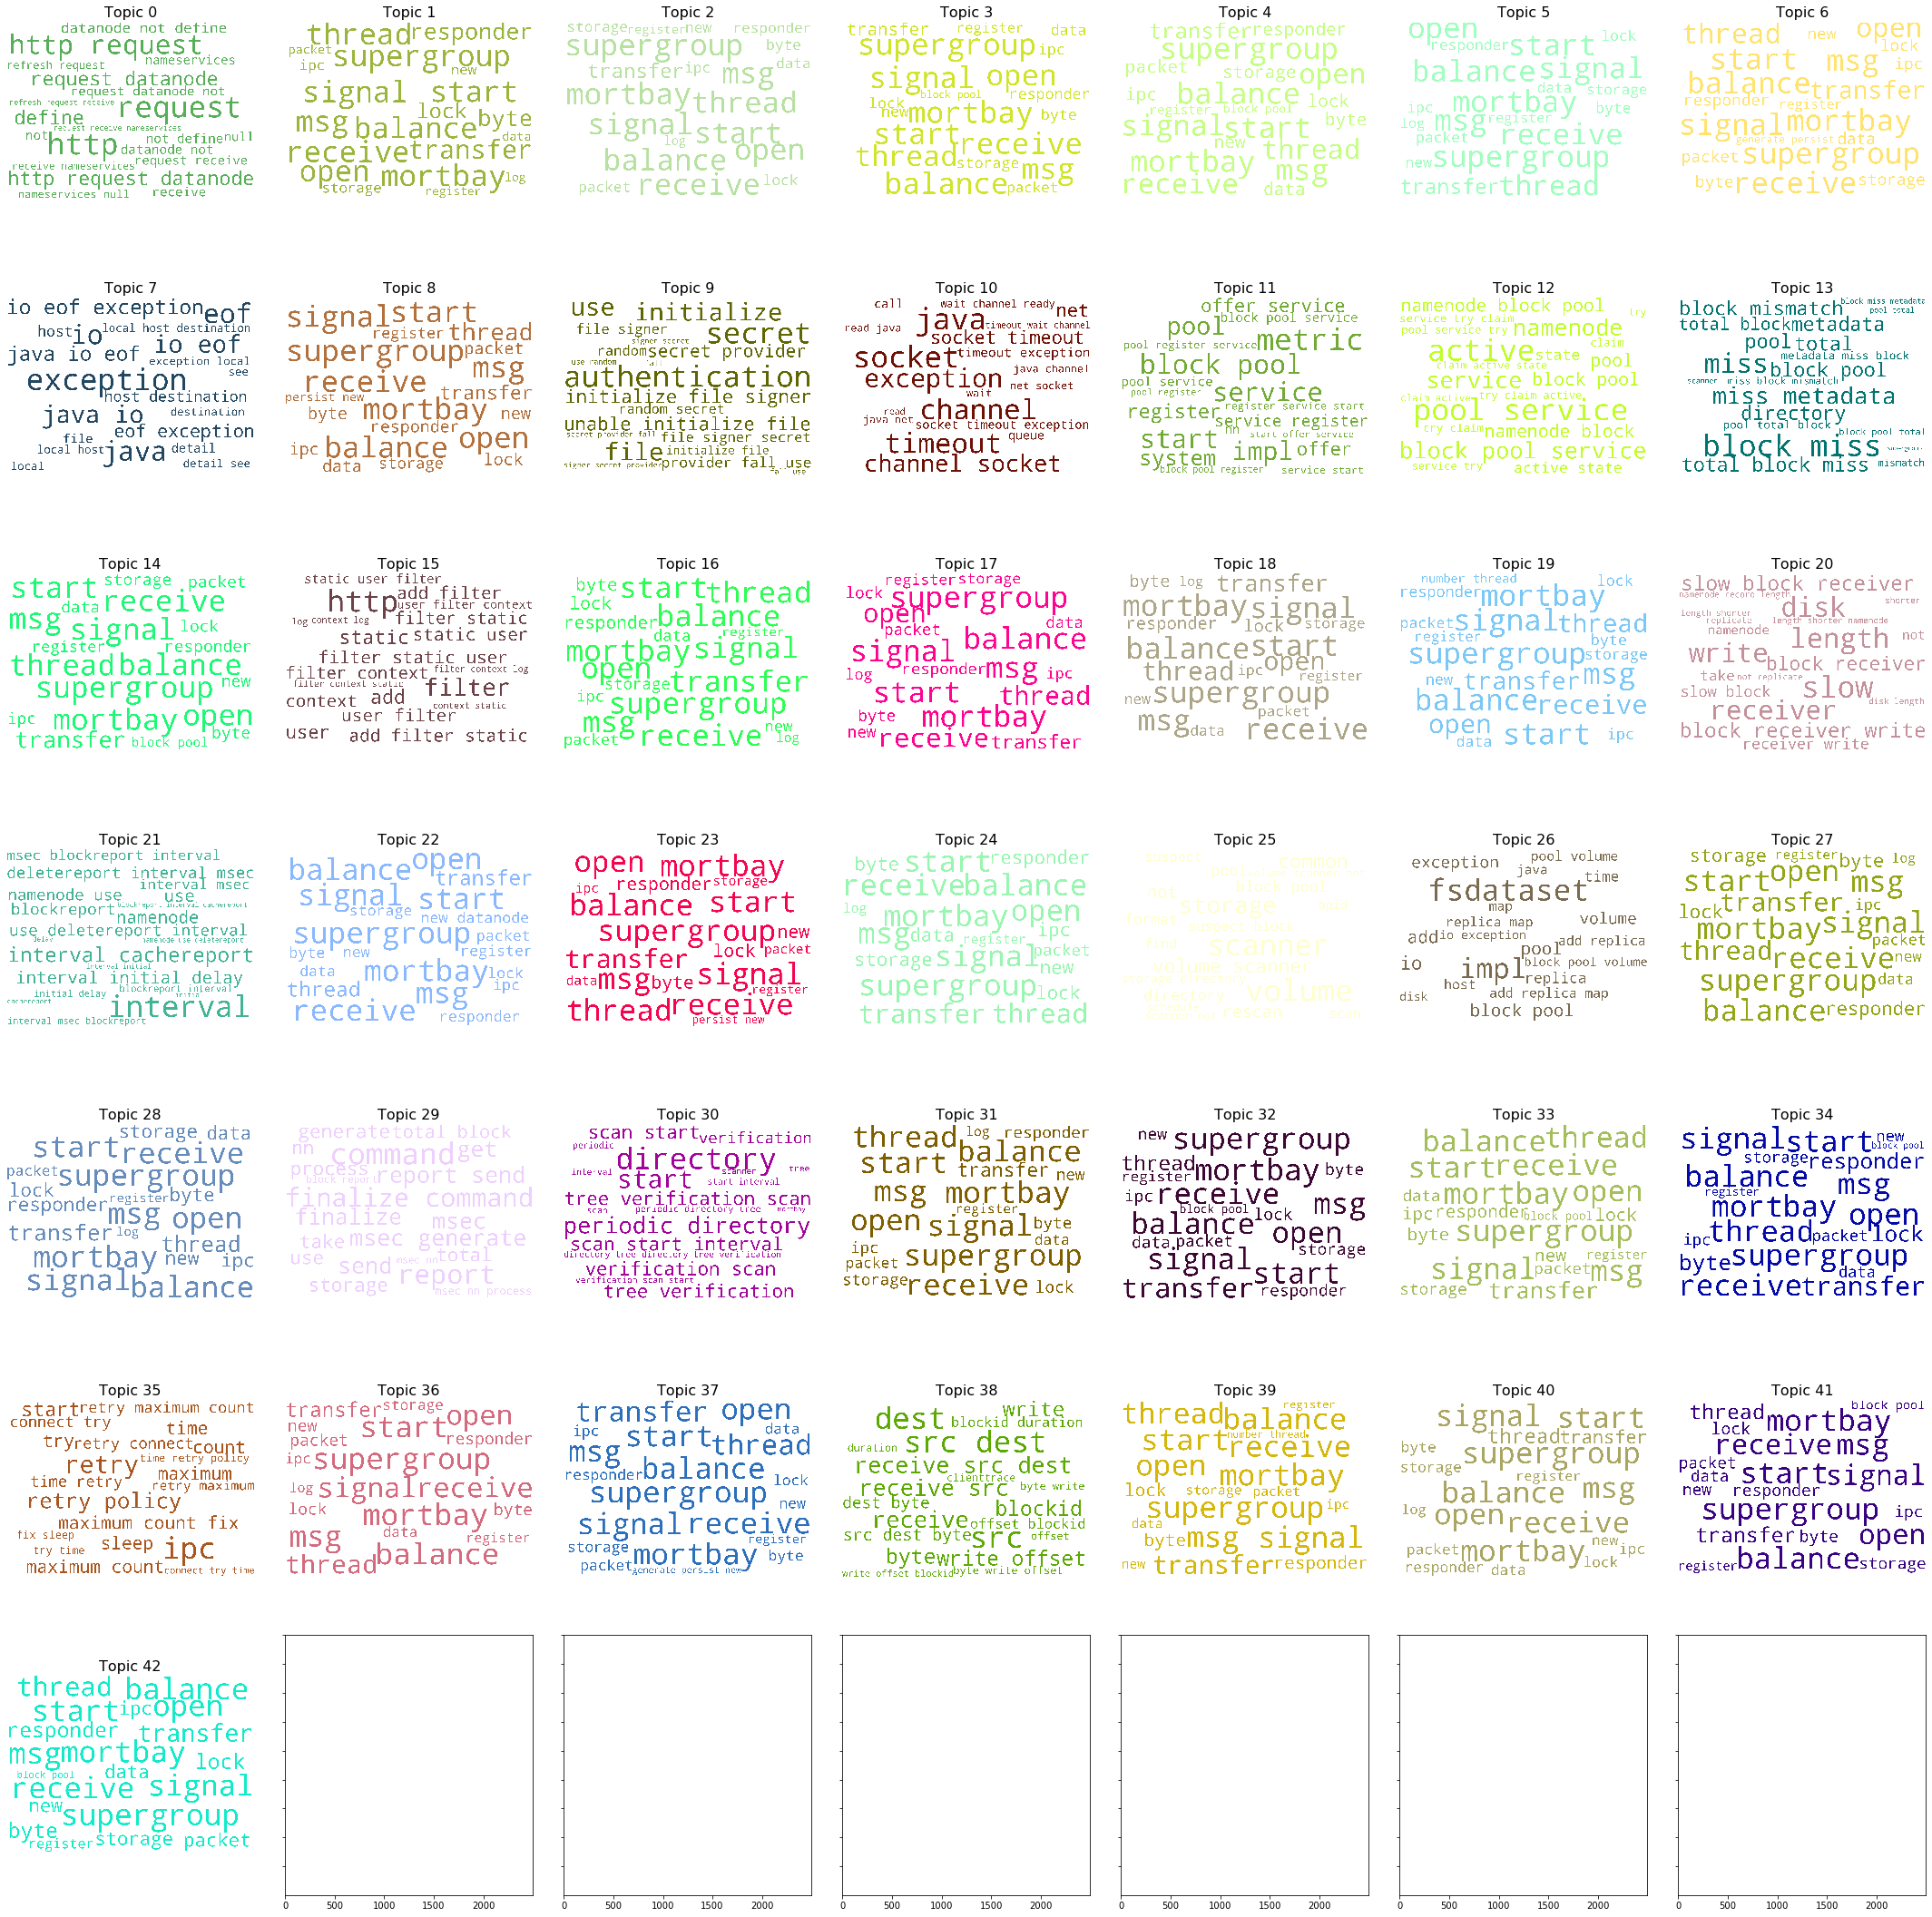

In [100]:
topics_words=WORDCLOUD(k,best_lda_model,a,b)

### MERGE TOPICS

In [80]:
def TO_MERGE(similardf):
    sim=similardf.values
    el_merge={}
    for i in range(len(sim)):
        el_merge[i]=[]
    for i,row in enumerate(sim):
        #print(i,"ROW")
        sim_val=[]
        for j,el in enumerate(row):
            if el>0.85 and j<i:
                #print("\t",i,"-",j,el)
                sim_val.append(j)
        for el1 in sim_val:
            #print("\t\t",el1)
            #if len(el_merge[el1])==0:
            el_merge[el1].append(i)
            #print("\t\tACT STATE",el1,el_merge[el1])
            break
    print("TO_MERGE")
    to_merge=[]
    for k,v in el_merge.items():
        if len(v)>0:
            v.append(k)
            v=sorted(v)
            to_merge.append((v))
            print((v))
    return to_merge

In [81]:
def MERGED_TOPICS(w2v,to_merge,to_drop,modelW2V):
    merged_topics=[]
    tm_processed=[]
    tot_merge=[]
    for el in to_merge:
        tot_merge=tot_merge+el
    print("STARTING LEN",len(w2v))
    for i,tp in enumerate(w2v):
        if i not in tot_merge:
            print("ADDING",i)
            merged_topics.append(tp)
        else:
            new_topic=[]
            to_add={}
            flag=False
            for j,tm in enumerate(to_merge):
                if i in tm and j not in tm_processed: #VEDO SE TOPIC i E' DA UNIRE E SE LA LISTA DI TO_MERGE NON e' GIa' STATA PROCESSATA
                    flag=True
                    for topic_idx in tm:
                        if i!=topic_idx:
                            print(i,topic_idx)
                            for word in w2v[topic_idx]:
                                if word not in to_add.keys():
                                    #print(word,1)
                                    to_add[word]=1
                                else:
                                    #print(word,to_add[word]+1)
                                    to_add[word]+=1
                    tm_processed.append(j) #INDICO QUELLA LISTA PROCESSATA
            print(i,flag)
            if flag:
                print("LIST PROCESSED",tm_processed)
                last_proc=to_merge[tm_processed[-1]]
                print("LAST LIST PROCESSED",last_proc)
                #print("----------------------------------")
                #print("TO_ADD:")
                for k,v in to_add.items():
                    #print(k,v)
                    if v+1==len(last_proc):
                        new_topic.append(k)
                #print("----------------------------------")
                print("LEN NEW TP",len(new_topic))
                print("ACT NEW TP",new_topic)
                num_el_still_add=20-len(new_topic)
                print("LEN TOT", len(to_add))
                
                if num_el_still_add == 0:
                    print(f"CURR LEN MERGED_TOPICS: {len(merged_topics)}")
                    merged_topics.append(w2v[i])
                    print(f"CURR LEN MERGED_TOPICS: {len(merged_topics)} AFTER ADDED {i}")
                else:
                    diz_keep={}
                    for k,v in to_add.items():
                        #print(k,v)
                        if v+1!=len(last_proc):
                            tot_sim=0
                            curr_v=modelW2V[k]
                            for word in new_topic:
                                act_v=modelW2V[word]
                                similarity=spatial.distance.cosine(curr_v, act_v)
                                tot_sim+=similarity
                            if k not in diz_keep.keys():
                                diz_keep[k]=tot_sim

                    sort_diz = dict( sorted(diz_keep.items(), key=operator.itemgetter(1),reverse=True))
                    print(sort_diz)
                    it=0
                    added_el=[]
                    for k,v in sort_diz.items():
                        print(k,v)
                        if it<num_el_still_add:
                            print("ADDING",k)
                            added_el.append(k)
                            new_topic.append(k)
                        it+=1
                    print("ADDED ELEMENT:",added_el)
                    print("FINAL NEW_TOPIC:",new_topic, len(new_topic))
                    merged_topics.append(new_topic)
                    print("\n")

    print(len(merged_topics))
    return merged_topics

In [82]:
w2v=[]
for tw in topics_words:
    tmp=[]
    for el in tw:
        splits=el.split(" ")
        tmp.append("_".join(splits))
    #print(tmp)
    w2v.append(tmp)

In [83]:
len(w2v)

43

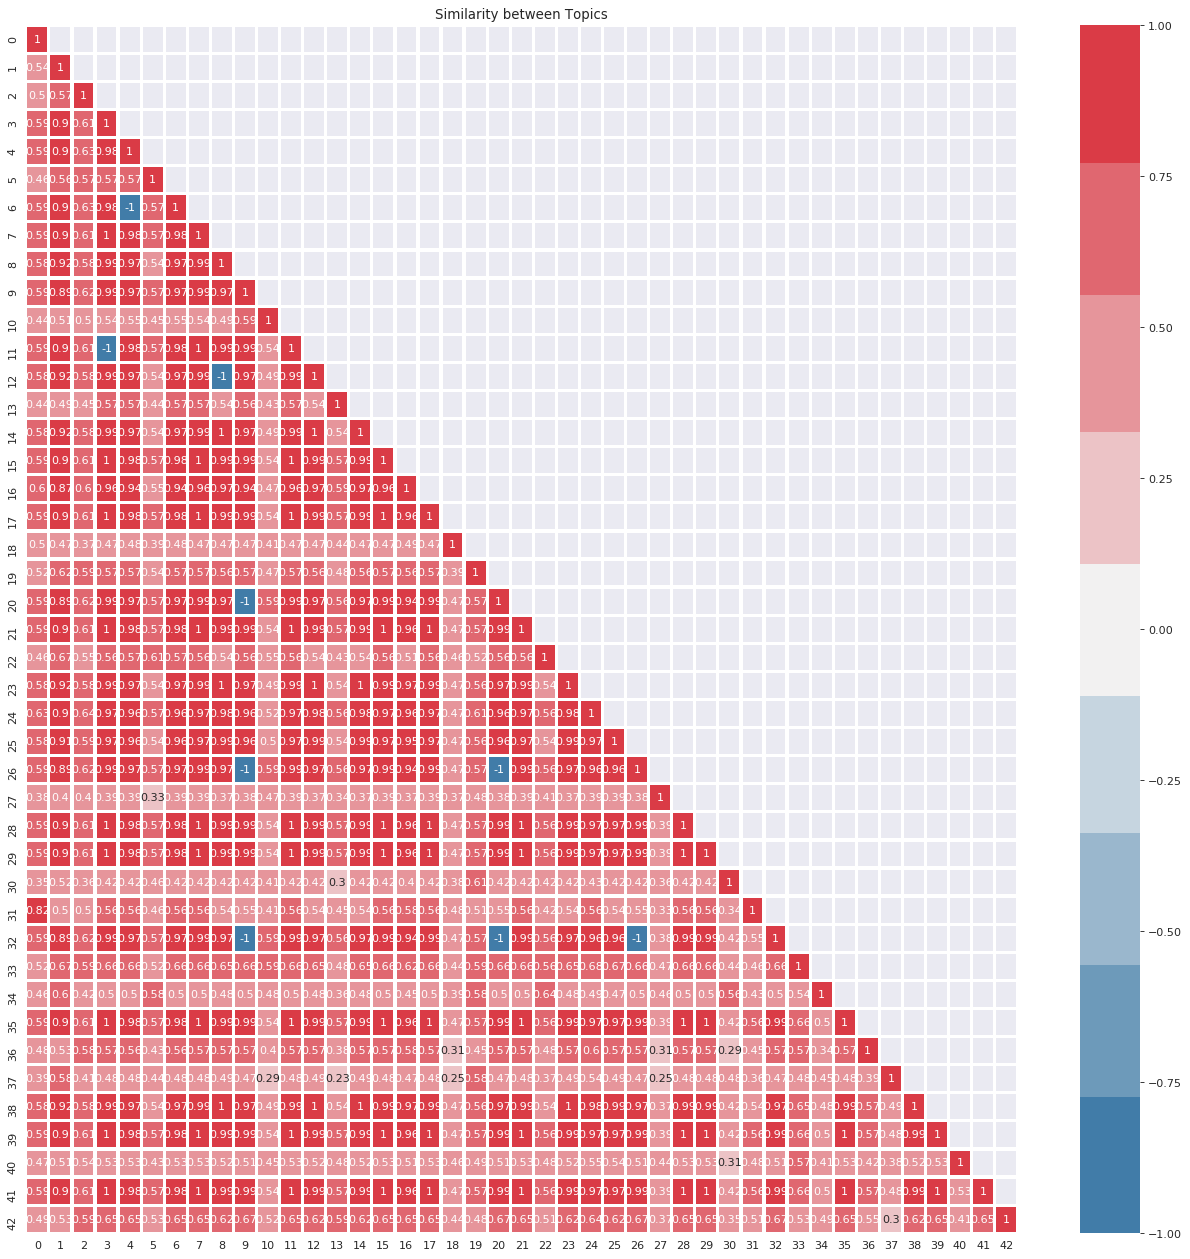

Features to be dropped:[3, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 20, 21, 23, 24, 25, 26, 28, 29, 32, 35, 38, 39, 41] - 25 - max: [1. 1. 1. 1. 1.]
k=43, alpha=0.4, eta=1, coherence=0.7450844788612586, to_drop=[3, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 20, 21, 23, 24, 25, 26, 28, 29, 32, 35, 38, 39, 41]


In [84]:
delta_k, to_drop,similardf=CLUSTERSIMILARITY(w2v, modelW2V,a,b, k)
print(f"k={k}, alpha={a}, eta={b}, coherence={coherence_cv}, to_drop={to_drop}")

In [ ]:
delta_k=1
while delta_k!=0:
    print("\nTO_DROP",to_drop)
    to_merge=TO_MERGE(similardf)
    merged_topics=MERGED_TOPICS(w2v,to_merge,to_drop,modelW2V)
    cm = CoherenceModel(topics=merged_topics, texts = data, corpus=corpus, dictionary=id2word, coherence = "c_v")
    coherence = cm.get_coherence() 
    print(f"COHERENCE - {len(merged_topics)}: {coherence}")
    w2v=merged_topics
    delta_k, to_drop,similardf=CLUSTERSIMILARITY(w2v, modelW2V,a,b, k)


In [37]:
################## LDA VISUALIZATION ##################################
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(best_lda_model, corpus, id2word)
vis

/home/bigdata-01QYD/s278561/.local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
27     0.074058  0.031706       1        1  12.253586
9     -0.055669  0.049468       2        1  11.016387
28    -0.007745 -0.026279       3        1   7.316505
30    -0.001140 -0.012786       4        1   5.799030
3     -0.002108 -0.008512       5        1   5.533444
11    -0.004344 -0.024489       6        1   5.496156
19    -0.003746 -0.012981       7        1   4.809159
0     -0.002576 -0.011206       8        1   4.234711
25    -0.001718 -0.007170       9        1   4.020884
5     -0.002290 -0.004357      10        1   3.700946
13     0.000911 -0.000720      11        1   3.439339
23    -0.000255 -0.004017      12        1   3.057299
26    -0.000533 -0.002531      13        1   2.920568
24     0.000492 -0.000984      14        1   2.364644
18    -0.006207  0.009626      15        1   1.892274
12     0.002454  0.002499      16        1   1.384680
29     0.001383  0.001906      17        1   1.384202
21     0.000365  0.001825      18        1   1.384099
4      0.000644  0.001340      19        1   1.384049
15     0.000701  0.001491      20        1   1.384010
6      0.000688  0.001485      21        1   1.384007
7      0.000662  0.001468      22        1   1.384006
14     0.000680  0.001480      23        1   1.384005
1      0.000662  0.001468      24        1   1.384005
17     0.000661  0.001467      25        1   1.384002
20     0.000661  0.001468      26        1   1.384001
2      0.000663  0.001469      27        1   1.384001
16     0.000659  0.001460      28        1   1.384001
10     0.000662  0.001469      29        1   1.384001
22     0.000663  0.001469      30        1   1.384000
8      0.000661  0.001469      31        1   1.383997, topic_info=                      Term      Freq     Total Category  logprob  loglift
235                 remote  3.000000  3.000000  Default  30.0000  30.0000
310          block manager  2.000000  2.000000  Default  29.0000  29.0000
359                  store  2.000000  2.000000  Default  28.0000  28.0000
354                 memory  2.000000  2.000000  Default  27.0000  27.0000
355           memory store  2.000000  2.000000  Default  26.0000  26.0000
..                     ...       ...       ...      ...      ...      ...
154          mapred hadoop  0.025285  2.003723  Topic31  -5.9863  -0.0923
315  storage block manager  0.025283  2.129347  Topic31  -5.9864  -0.1532
314          storage block  0.025278  2.129327  Topic31  -5.9866  -0.1534
29               partition  0.025275  2.027815  Topic31  -5.9867  -0.1047
152                 hadoop  0.025271  2.006354  Topic31  -5.9868  -0.0942

[1697 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
68        2  0.657901             backend
84        2  0.502671      backend driver
105       2  0.519238    backend register
310       7  0.364082       block manager
0         8  0.455864           broadcast
...     ...       ...                 ...
60        1  0.495949          task ismap
66        1  0.510197      task partition
42        1  0.366021                 use
43        1  0.365997       use mapreduce
54        1  0.401888  use mapreduce task

[63 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[28, 10, 29, 31, 4, 12, 20, 1, 26, 6, 14, 24, 27, 25, 19, 13, 30, 22, 5, 16, 7, 8, 15, 2, 18, 21, 3, 17, 11, 23, 9])

In [198]:
best_k=k

In [ ]:
################## WORD COUNT AND IMPORTANCE ##########################

from collections import Counter

topics = best_lda_model.show_topics(num_topics=best_k,formatted=False)
data_flat = [w for w_list in data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
print(df)

# Plot Word Count and Weights of Topic Keywords
plot_size=int(np.ceil(np.sqrt(best_k)))
fig, axes = plt.subplots(plot_size, plot_size, figsize=(30,30), sharey=True, dpi=160)
tmp = [color for name, color in mcolors.XKCD_COLORS.items()]#mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
offset=int(len(tmp)/best_k)
print(offset)
cols=tmp[1::offset]
print(cols)

axes=axes.flatten()
for i in range(best_k):
    ax=axes[i]
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.040); ax.set_ylim(0, 40)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left')
    ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=1)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.savefig(f"{name}_{tipo}_WORD_COUNT_IMPORTANCE.png")
plt.show()

In [ ]:
f=open(currdir+f"/INPUT/{name}/{tipo}/{name}_Raw_{tipo}.txt","r")
lines=f.readlines()
originals=[]
for i,line in enumerate(lines):
    line=line.rstrip("\n")
    s=line.split(":")
    s1=s[1:]
    line1=":".join(s1)
    print(i,line)
    print(i,data[i])
    #print(i,line1)
    originals.append(line)
f.close()
print(len(originals))

In [102]:
###################### SENTENCE TOPIC DOMINANCE ###############################
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data, raw=originals):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list     
        tmp=[el[1] for el in row_list]
        #print(len(row_list),np.argmax(tmp))
        #print(tmp)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                orig=raw[i]
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords, orig]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords','Raw']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=best_lda_model, corpus=corpus, texts=data, raw=originals)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Raw','Text']
df_dominant_topic.to_csv(currdir+path+f"{name}_LDA_RESULTS_{tipo}_k={k}_a={a}_b={b}.csv")
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Raw,Text
0,0,7.0,0.3551,"exception, eof, java, io, java io, io eof, io ...",Caused by java.io.EOFException,"[cause, java, io, eof, exception, java io, io ..."
1,1,26.0,0.4608,"fsdataset, impl, io, add, pool, block pool, ex...",Caused by java.io.IOException: Connection res...,"[cause, java, io, io, exception, connection, r..."
2,2,10.0,0.7025,"java, socket, timeout, channel, exception, cha...",Caused by java.net.SocketTimeoutException: 60...,"[cause, java, net, socket, timeout, exception,..."
3,3,7.0,0.3347,"exception, eof, java, io, java io, io eof, io ...",java.io.EOFException,"[java, io, eof, exception, java io, io eof, eo..."
4,4,7.0,0.6795,"exception, eof, java, io, java io, io eof, io ...",java.io.EOFException End of File Exception be...,"[java, io, eof, exception, end, file, exceptio..."
...,...,...,...,...,...,...
94,94,25.0,0.4594,"volume, scanner, storage, common, volume scann...",org.apache.hadoop.hdfs.server.datanode.VolumeS...,"[volume, scanner, volume, scanner, suspect, qu..."
95,95,15.0,0.2459,"http, filter, static, add, user, add filter st...",org.apache.hadoop.hdfs.server.datanode.web.Dat...,"[http, listen, http, traffic, listen http, htt..."
96,96,37.0,0.0233,"supergroup, mortbay, start, balance, msg, sign...",org.mortbay.log: jetty-6.1.26,[mortbay]
97,97,15.0,0.0263,"http, filter, static, add, user, add filter st...",org.mortbay.log: Logging to org.slf4j.impl.Log...,"[mortbay, log, mortbay log]"


NameError: name 'modelW2V' is not defined

In [ ]:
##################### SENTENCE CHART TOPIC COLOR ######################################
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=best_lda_model, corpus=corpus, start = 0, end = 45):
    corp = corpus[start:end]
    tmp = [color for name, color in mcolors.XKCD_COLORS.items()]#mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
    offset=int(len(tmp)/best_k)
    print(offset)
    mycolors=tmp[1::offset]
    print(cols)

    fig, axes = plt.subplots(end-start, 1, figsize=(30, (end-start)*0.95), dpi=150)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        ax.axis("off")
        if i > 0:
            corp_cur = corp[i-1] 
            #print(corp_cur)
            topic_percs = lda_model[corp_cur]
            #print(topic_percs)
            #wordid_topics = 
            word_dominanttopic=[]
            for id,f in corp_cur:
                w=lda_model.id2word[id]
                t=lda_model.get_term_topics(id)
                #print(w,f,t)
                #print("\n")
                if len(t)>0:
                    word_dominanttopic.append((w,t[0][0]))
            #print(lda_model.get_document_topics(corp_cur))
            #word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.3, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    mul=len(word)
                    if len(word)>15:
                        mul=mul/1.1
                    word_pos += .005 * mul  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.99, x=0.5, fontweight=700)
    plt.tight_layout()
    plt.savefig(f"{name}_{tipo}_SENTENCE_CHART_TOPIC_COLOR.png")
    plt.show()

sentences_chart()    

In [203]:
tpcs=df_dominant_topic['Dominant_Topic'].values.tolist()
print(type(tpcs))
topics=[]
for tp in tpcs:
    topics.append(int(tp))
print(topics)
tp_set=set(topics)
print(tp_set)

<class 'list'>
[39, 31, 41, 9, 25, 25, 37, 40, 40, 37, 37, 0, 41, 6, 32, 2, 32, 39, 32, 39, 32, 34, 34, 6, 40, 31, 31, 34, 6, 24, 39, 0, 1, 40, 14, 41, 14, 14, 36, 6, 31, 40, 26, 31, 37]
{0, 32, 2, 34, 1, 37, 6, 39, 40, 41, 9, 36, 14, 24, 25, 26, 31}


In [ ]:
############################### T-SNE  ###################################

# Get topic weights
topic_weights = []
for i, row_list in enumerate(best_lda_model[corpus]):
    #print(row_list)
    topic_weights.append([w for i, w in row_list])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values
print(arr.shape)

# Keep the well separated points (optional)
#arr = arr[np.amax(arr, axis=1) > 0.35]
print(arr.shape)

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)
print(tsne_lda.shape)
print(type(tsne_lda))

tmp = [color for name, color in mcolors.XKCD_COLORS.items()]#mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
print("TMP",len(tmp))
offset=int(len(tmp)/100)
#print(offset)
mycolors=tmp[1::offset]
customPalette=sns.set_palette(sns.color_palette(mycolors, as_cmap=True))
print(mycolors)

print(len(topics))
df_subset=pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_lda[:,0]
df_subset['tsne-2d-two'] = tsne_lda[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=topics,
    palette=sns.color_palette(mycolors, 17),#sns.color_palette("PRGn",100, as_cmap=True),
    data=df_subset,
    legend="full",
    alpha=1,
    s=100
)
plt.savefig(f"{name}_{tipo}_TSNE.png")


## NMF

## LSI